# Practice 3: Modeling response to radiosurgery of brain metastases

In the beginning, the cancer develops in a certain part of the organism. As the disease progresses, there is a possibility, depending on the type of cancer, that malignant cells migrate through the bloodstream or lymphatic vessels and invade a new organ, which is called
metastasis. To detect the metastasis, image tests are frequently used. In the case of the brain, the standard is cranial magnetic resonance with gadolinium. Normally, patients with this disease are followed up every 3-4 months by imaging tests.

<img src="img/im.png">

Treatment depends on the size and type of the primary tumor, number of metastases, and the general health of the patient. Patients with between one and three metastases can be treated with very localized radiation (stereotactic), which allows to irradiate only the part of the brain affected by the disease and is better than their alternatives in terms of quality of life.<br>
The Hospital del Guadiana has contacted us to try to describe the behavior of brain metastases in patients at its center. These are lung cancer patients who are irradiated after a certain time of follow-up. In order to fine-tune the work methodology, we are provided with data on the volumetric growth of two tumors obtained from imaging tests.

| Days         | 0 | 197 | 454 | 477 |
|---|---|---|---|---|
|Volume ($mm^3$)|502| 930 | 3700| 4010|

**Table 1: Volumetric temporal evolution of patient T112251 without radiosurgery treatment.**

|Days|0|144|218|284|413|505|
|---|---|---|---|---|---|---|
|Volume ($cm^3$)|1.846|4.285|7.289|18.67|10.81|19.01|

**Table 2: Volumetric temporal evolution of patient T135728 with radiosurgery treatment. In the case of
this patient the radiosurgery takes place at 318 days of the diagnosis of the injury.**

We want to know if it is possible to quantitatively describe the growth and response to radiosurgery of metastases with the information that can be obtained from the images.

**Groups of students must be formed to develop the following activities**

* It would be possible to estimate when the lesion will reach a maximum diameter of about 5-6 cm that would be incompatible with life?
* Can you estimate the effectiveness of the therapy, this is what fraction of tumor cells have been destroyed by radiosurgery?

In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

In [72]:
data_1_days = np.array([0, 197, 454, 477])
data_1_volume = np.array([0.502, 0.930, 3.700, 4.010]) # volume of tumor in cm^3

data_2_days = np.array([0, 144, 218, 284, 413, 505])
data_2_volume = np.array([1.846, 4.285, 7.289, 18.670, 10.810, 19.010]) # volume in cm^3
data_2_radiosurgery_day = 318

Let's plot our data:

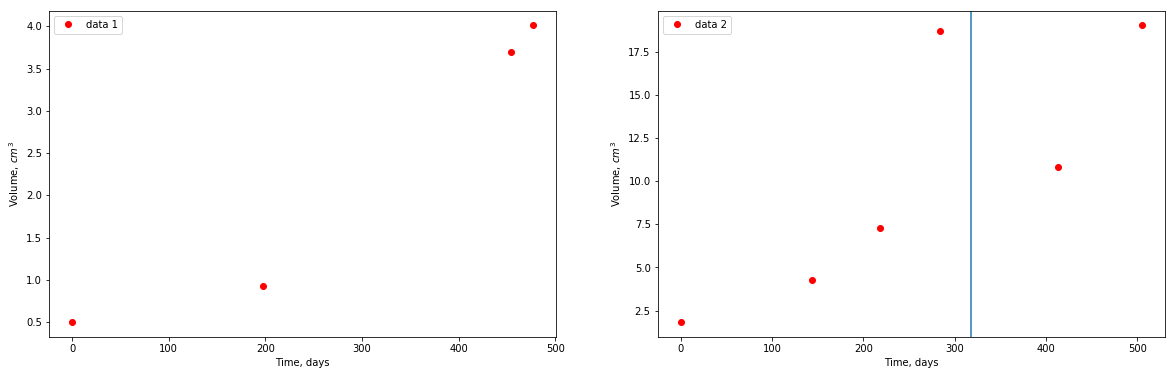

In [73]:
plt.rcParams["figure.figsize"] = (20, 6)
plt.subplot(1, 2, 1);
plt.plot(data_1_days, data_1_volume, 'ro', label='data 1');
plt.xlabel("Time, days")
plt.ylabel("Volume, $cm^3$")
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(data_2_days, data_2_volume, 'ro', label='data 2');
plt.axvline(data_2_radiosurgery_day);
plt.xlabel("Time, days")
plt.ylabel("Volume, $cm^3$")
plt.legend();

Critical tumor diameter is 5 - 6 cm. Assuming that tumor is spherical it means that critical volume starts from: 

In [109]:
diam_crit = 5 # mm
# v_crit = np.pi / 6 * np.power(diam_crit, 3)
v_crit = 4 / 3 * np.pi * np.power(diam_crit / 2, 3)
print(v_crit)

65.44984694978736


The question of saturation conditions was not described in detail. Here we will use model that neglects that effect:

$$N(t) = {N(t_0)}exp\Big(\frac{t - t_0}{\tau}\Big)$$

In [75]:
N_0 = None
def model_2(t, tau):
    """Model #2 formula"""
    t0 = 0
    n0 = N_0
    return n0 * np.exp((t - t0) / tau)

In [89]:
# fit first patient data
N_0 = data_1_volume[0]
p_opt_1, p_cov_1 = curve_fit(model_2, data_1_days, data_1_volume, bounds=(0, 1000))

# fit second patient data before surgery
N_0 = data_2_volume[0]
p_opt_2, p_cov_2 = curve_fit(model_2, data_2_days[0:4], data_2_volume[0:4], bounds=(0, 1000))

# fit second patient data after surgery
N_0 = data_2_volume[4]
p_opt_3, p_cov_3 = curve_fit(model_2, data_2_days[4:], data_2_volume[4:], bounds=(0, 1000))

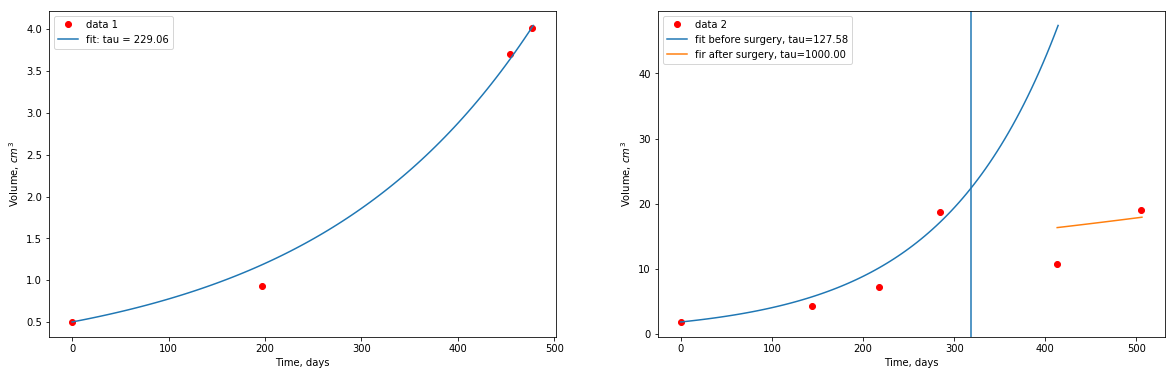

In [90]:
plt.rcParams["figure.figsize"] = (20, 6)
plt.subplot(1, 2, 1);
plt.plot(data_1_days, data_1_volume, 'ro', label='data 1');
N_0 = data_1_volume[0]
x = np.linspace(data_1_days[0], data_1_days[-1] + 1, 100)
plt.plot(x, model_2(x, *p_opt_1), label='fit: tau = {:.2f}'.format(p_opt_1[0]))
plt.xlabel("Time, days")
plt.ylabel("Volume, $cm^3$")
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(data_2_days, data_2_volume, 'ro', label='data 2');
plt.axvline(data_2_radiosurgery_day);
# plot data fit before surgery
N_0 = data_2_volume[0]
x = np.linspace(data_2_days[0], data_2_days[4] + 1, 100)
plt.plot(x, model_2(x, *p_opt_2), label='fit before surgery, tau={:.2f}'.format(p_opt_2[0]))
N_0 = data_2_volume[4]
x = np.linspace(data_2_days[4], data_2_days[-1] + 1, 50)
plt.plot(x, model_2(x, *p_opt_3), label='fir after surgery, tau={:.2f}'.format(p_opt_3[0]))
plt.xlabel("Time, days")
plt.ylabel("Volume, $cm^3$")
plt.legend();

To answer on the first question we have to solve equation:
$$model(t) = V_{crit}$$

In [105]:
def find_root_of_it(t):
    return model_2(t, *p_opt_1) - v_crit

In [106]:
x = fsolve(find_root_of_it, 50)

In [107]:
x

array([412.50161862])

In [110]:
v_crit

65.44984694978736

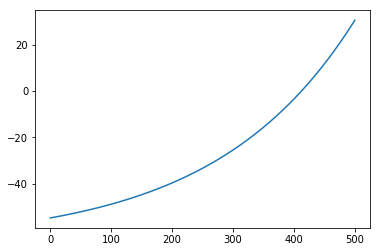

In [111]:
time = np.linspace(0, 500, 500)
plt.plot(time, find_root_of_it(time))

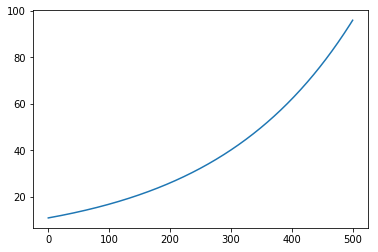

In [112]:
plt.plot(time, model_2(time, *p_opt_1))